# Lab 9 (26-03-2024)

### Use a dataset of your choice and use SVM on that dataset.

Dataset : Iris Dataset 

The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species - Setosa, Versicolour, and Virginica)

- The given dataset is already cleaned (Preprocessed +  Scaled)
- Use SVM for classification (SVC)


In [37]:
Registration_Number = "22011103048"
Name = "Roahith R"

# Python Program to Get IP Address
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)

print("My name is " + Name + " and my roll no : " + Registration_Number)
print("Computer IP Address is: " + IPAddr)

My name is Roahith R and my roll no : 22011103048
Computer IP Address is: 10.17.160.190


In [38]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [39]:
# Load Iris Dataset
data = load_iris()
df = pd.DataFrame(data=data['data'],columns=data.feature_names)
df['Target'] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

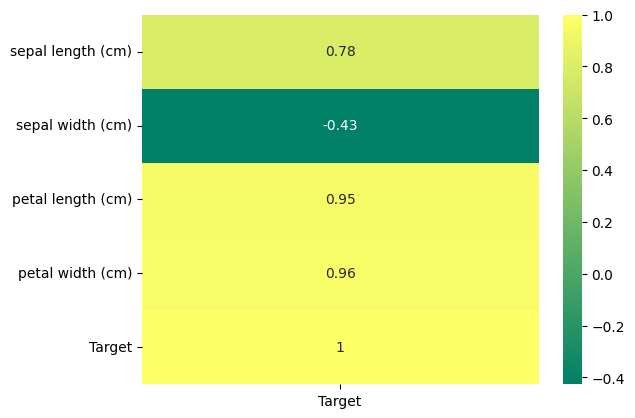

In [40]:
sns.heatmap(df.corr()['Target'].to_frame(),annot=True,cmap='summer')

### The three classes in the Iris dataset:

 1.   Iris-setosa (n=50)
 2.   Iris-versicolor (n=50)
 3.   Iris-virginica (n=50)

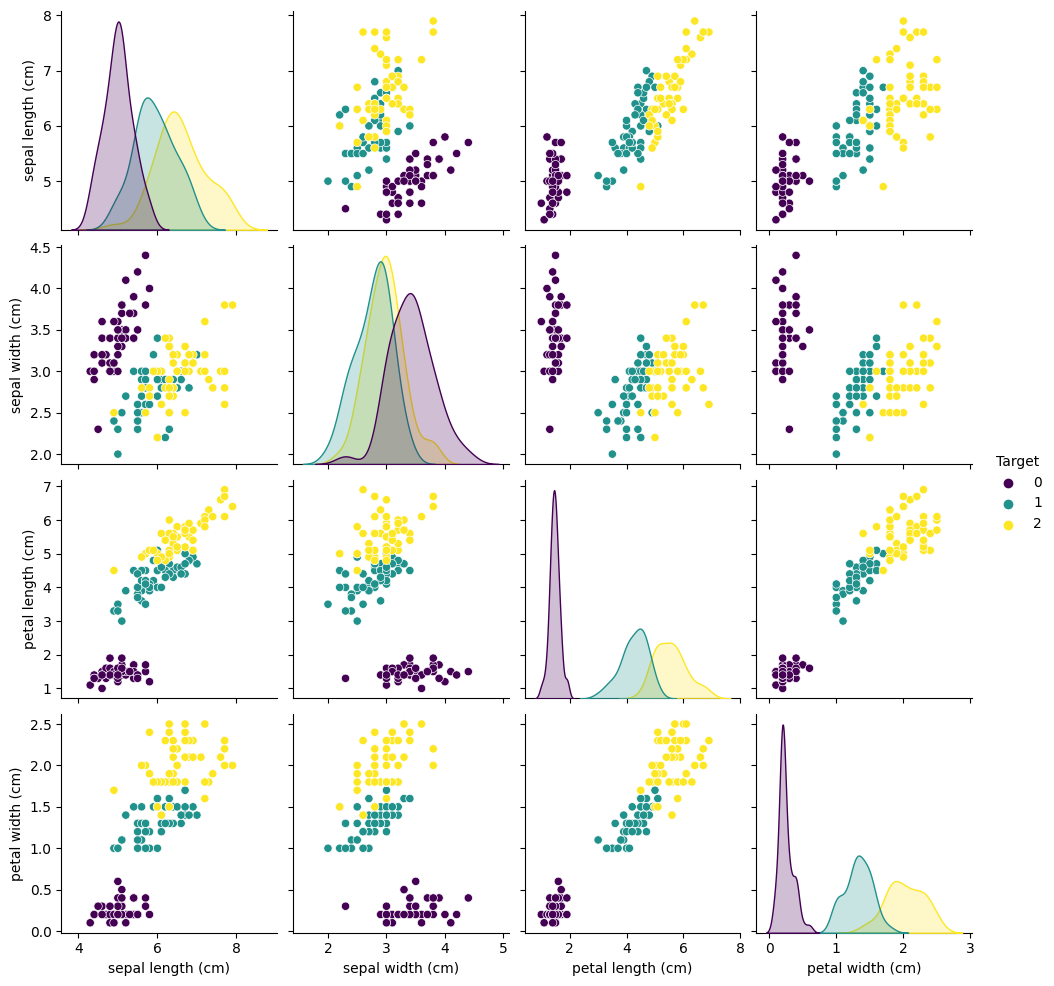

In [41]:
sns.pairplot(df,hue='Target',palette='viridis')

Here, Petal length  and Petal width has the highest correlation of 0.95 nad 0.96 respectively with the *Target*.
Thus we choose both these features in training the model

In [42]:
# Split Train - Test 
x = df.drop('Target',axis=1)[['petal length (cm)','petal width (cm)']]
y = df['Target']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=143)



In [43]:
# We use SVM classifier (SVC) for classification of 3 Target classes

## Fit into model
model = SVC()
model.fit(x_train,y_train)

Y_pred = model.predict(x_test)


In [44]:
print(f" The Accuracy Score of the above trained SVC on the'Iris' Dataset is : {(accuracy_score(y_test,Y_pred) * 100) :.3f} %")

 The Accuracy Score of the above trained SVC on the'Iris' Dataset is : 93.333 %


<Axes: >

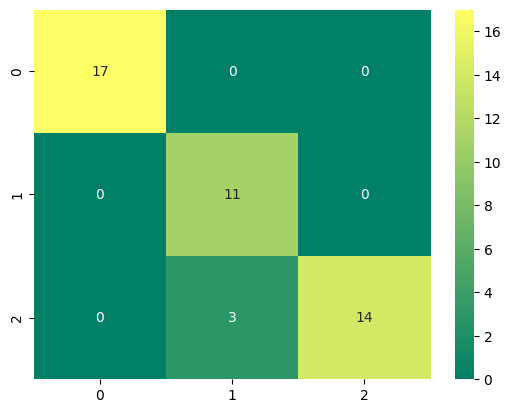

In [45]:
## Model Evaluation 
sns.heatmap(confusion_matrix(y_test,Y_pred),annot=True,cmap='summer')

In [46]:
print(" The Classification Report : ")
print(classification_report(y_test,Y_pred))

 The Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.79      1.00      0.88        11
           2       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



c:\Users\Roahith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


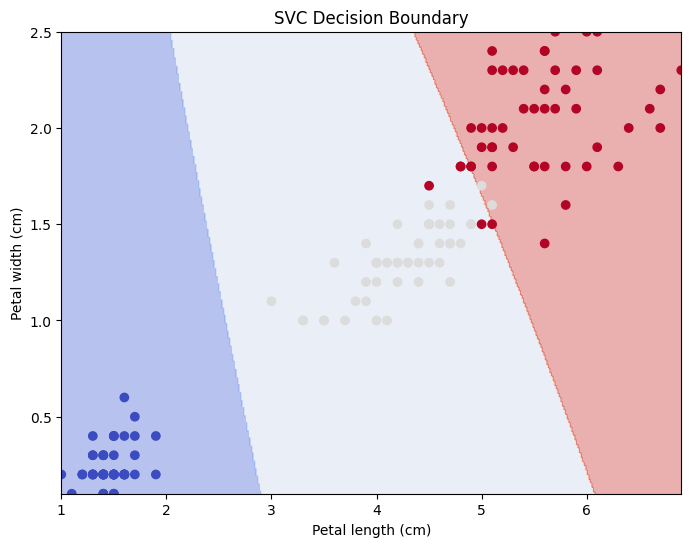

In [49]:
# Visualize the SVC

def plot_svc_decision_boundary(svc_model, X, y, figsize=(8, 6)):
  plt.figure(figsize=figsize)
  # Create mesh for plotting
  xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 400),
                       np.linspace(X[:, 1].min(), X[:, 1].max(), 400))

  # Predict on the mesh
  Z = svc_model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot decision boundary and data points
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
  plt.xlabel('Petal length (cm)')
  plt.ylabel('Petal width (cm)')
  plt.title('SVC Decision Boundary')
  plt.show()

plot_svc_decision_boundary(model,x.to_numpy(),y.to_numpy())